Use a programming language or package where random forests can be trained and
applied. Examples include Python (scikit-learn package), R and Matlab.
1. On any of the binary and multi-class classification datasets, using the training and
test sets specified in ProjectsData.pdf, perform the following tasks:

a) For each of k in (3; 10; 30; 100; 300) train a random forest with k trees and
report the training misclassification error in a table.

b) In the same table report the misclassification error on the test set for all the
trained forests from a).

c) Plot on the same graph the training errors and test errors from a) and b) vs number
of trees as two separate curves.

The datasets with 4-fold cross-val mean that 4-fold cross-validation should be performed
on that dataset.

# Import Library

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np

Load Hill-valley Data

In [5]:
# for the hill valley data
#t=time.time()
path='/Users/soumak/Google Drive/computer science/machine_learning_barbu/binary_datasets/hill-valley/'
hill_valley_train_x=np.array(pd.read_csv(path+'X.dat',sep=" ",header=None))
hill_valley_train_y=np.array(pd.read_csv(path+'Y.dat',sep=" ",header=None))
hill_valley_test_x=np.array(pd.read_csv(path+'Xtest.dat',sep=" ",header=None))
hill_valley_test_y=np.array(pd.read_csv(path+'Ytest.dat',sep=" ",header=None))

In [6]:
hill_valley_train_x.shape

(606, 100)

In [7]:
hill_valley_test_x.shape

(606, 100)

In [8]:
from sklearn.ensemble import RandomForestClassifier
no_of_trees = [3, 10, 30, 100, 300]
train_error_list=[]
test_error_list=[]
for k in no_of_trees:
    clf = RandomForestClassifier(n_estimators=k,random_state=0)
    clf.fit(hill_valley_train_x, hill_valley_train_y) 
    predict_train=clf.predict(hill_valley_train_x)
    train_error=np.average(predict_train!=hill_valley_train_y)
    predict_test=clf.predict(hill_valley_test_x)
    test_error=np.average(predict_test!=hill_valley_test_y)
    train_error_list.append(float(train_error))
    test_error_list.append(float(test_error))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConv

In [9]:
print(train_error_list)
print(test_error_list)

[0.4998475095034256, 0.4997603720768116, 0.4999128625733861, 0.4999128625733861, 0.4999128625733861]
[0.4999782156433465, 0.5010238647627139, 0.5004356871330697, 0.5002178435665349, 0.5003703340631093]


In [10]:
%matplotlib inline

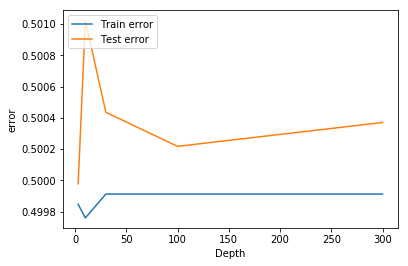

In [11]:
plt.plot(no_of_trees, train_error_list, label='Train error')
plt.plot(no_of_trees, test_error_list, label='Test error')
plt.ylabel('error')
plt.xlabel('Depth')
plt.legend(loc='upper left')
plt.show()